![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Confusion matrix and cross-validation</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainCrossValidation.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})
# np.random.seed(1)

### Download MNIST data:

In [2]:
from sklearn.datasets import fetch_openml

mX, vY = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
mX.shape, vY.shape

((70000, 784), (70000,))

In [3]:
# from scipy import io

# io.savemat('MnistData.mat', {'mX' : mX, 'vY' : vY.astype(np.float)})

In [4]:
# from scipy import io

# #-- Load locally:
# dData = io.loadmat('MnistData.mat')
# mX    = dData['mX']
# vY    = dData['vY'].squeeze()

# mX.shape, vY.shape

### Plot a few examples:

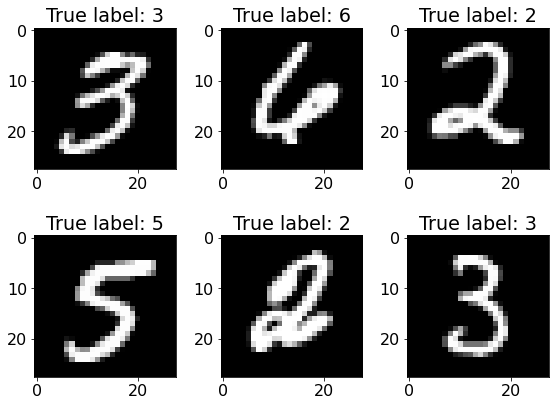

In [5]:
N, d   = mX.shape
fig, _ = plt.subplots(2, 3, figsize=(8,6))
for ax in fig.axes:
    idx = np.random.randint(0, N)
    ax.imshow   (np.reshape(mX[idx,:], (28, 28)), cmap='gray')
    ax.set_title(f'True label: {vY[idx]}')
    
plt.tight_layout()
plt.show()

### Split data to train and validation (test) sets:

In [6]:
nTrain  = 2000
nTest   = 1500
vIdx    = np.random.choice(N, nTrain + nTest)
mX      = mX[vIdx,:]
vY      = vY[vIdx]

In [7]:
from sklearn.model_selection import train_test_split

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, train_size=nTrain, test_size=nTest)

(mTrainX.shape, 
vTrainY.shape, 
mTestX.shape,  
vTestY.shape)

((2000, 784), (2000,), (1500, 784), (1500,))

### Train a K-NN classifier ($K=1$):

In [8]:
from sklearn.neighbors import KNeighborsClassifier

oKnn = KNeighborsClassifier(n_neighbors=1).fit(mTrainX, vTrainY)

#### Predict a single (test) example

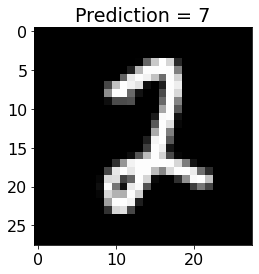

In [9]:
#-- from test:
idx  = np.random.randint(nTest)
vXi  = mTestX[idx,:]
yHat = oKnn.predict(vXi[None,:])[0]


plt.imshow(np.reshape(vXi, [28, 28]), cmap='gray')
plt.title(f'Prediction = {yHat}')
plt.show()


#### Score on the test set:

In [10]:
oKnn.score(mTestX, vTestY)

0.9093333333333333

### Plot confusion matrices:

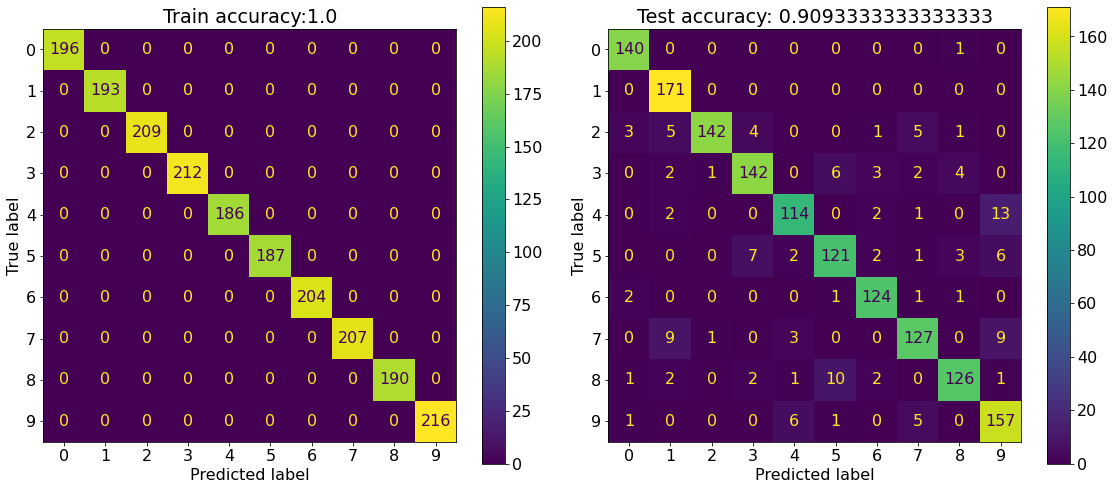

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vTrainHatY = oKnn.predict(mTrainX) #-- predict trian set
vTestHatY  = oKnn.predict(mTestX)  #-- predict test set

#-- Compute confusion matrices:
mTrainConfusion = confusion_matrix(vTrainY, vTrainHatY)
mTestConfusion  = confusion_matrix(vTestY,  vTestHatY)

_, ax = plt.subplots(1, 2, figsize=(16,7))
ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(10)).plot(values_format='g', ax=ax[0])
ConfusionMatrixDisplay(mTestConfusion,  display_labels=range(10)).plot(values_format='g', ax=ax[1])

ax[0].set_title ('Train accuracy:' f'{np.mean(vTrainY == vTrainHatY)}')
ax[1].set_title ('Test accuracy: ' f'{np.mean(vTestY  == vTestHatY)}')
plt.tight_layout()
plt.show        ()

K-NN (with $k=1$) will always provide a perfect __train__ classification accuracy.  
Let us check the cross-validation accuracy (with 10 folds): 

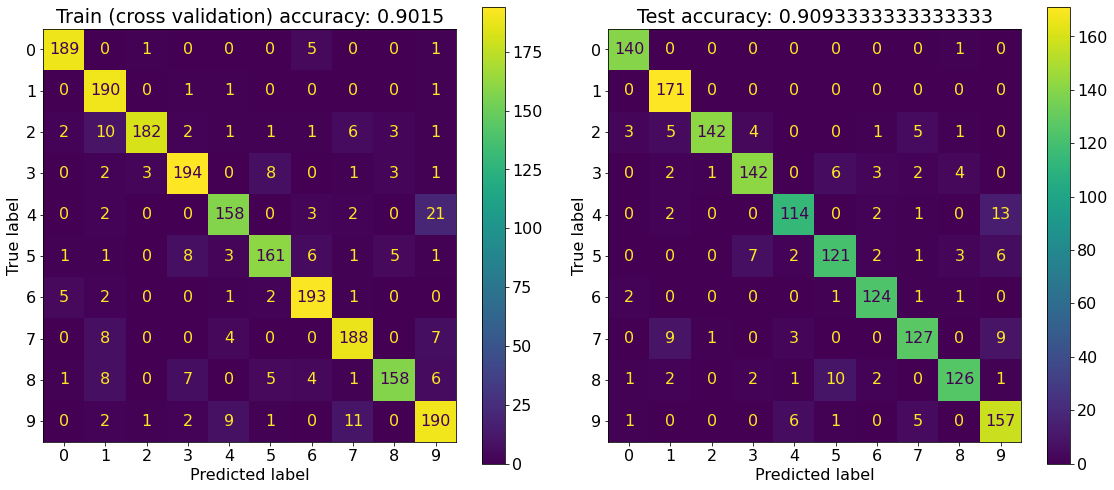

In [13]:
from sklearn.model_selection import cross_val_predict, KFold

#-- Applt cross validation:
vTrainHatY      = cross_val_predict(KNeighborsClassifier(n_neighbors=1), mTrainX, vTrainY, cv=KFold(10, shuffle=True))
mTrainConfusion = confusion_matrix(vTrainY, vTrainHatY)

_, ax = plt.subplots(1, 2, figsize=(16, 7))
ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(10)).plot(values_format='d', ax=ax[0])
ConfusionMatrixDisplay(mTestConfusion,  display_labels=range(10)).plot(values_format='d', ax=ax[1])

ax[0].set_title ('Train (cross validation) accuracy: ' f'{np.mean(vTrainY == vTrainHatY)}')
ax[1].set_title ('Test accuracy: '                     f'{np.mean(vTestY  == vTestHatY)}')
plt.tight_layout()
plt.show        ()

### Cross validation on $K$:

In [14]:
import pandas as pd
from   sklearn.model_selection import cross_val_predict

dRes = pd.DataFrame(columns=['K', 'Accuracy'])

for K in range(1, 12):
    vTrainHatY          = cross_val_predict(KNeighborsClassifier(n_neighbors=K), mTrainX, vTrainY, cv=KFold(10, shuffle=True))
    accuracy            = np.mean(vTrainY == vTrainHatY)
    dRes.loc[len(dRes)] = [K, accuracy]

dRes.sort_values(by='Accuracy', ascending=False)

,K,Accuracy
4,5.0,0.9080
3,4.0,0.9065
5,6.0,0.9060
0,1.0,0.9055
2,3.0,0.9030
6,7.0,0.9005
7,8.0,0.8965
8,9.0,0.8955
10,11.0,0.8930
9,10.0,0.8925


### Exercise
* Use the same MNIST data.
* Use a linear SVM classifier.
* Use cross-validation to find the optimal value of $C$.

In [15]:
???

Object `?` not found.
